# Loan Default Prediction Dataset

#### The code gives an exploratory data analysis,
#### and helps to predict the individuals that will default on their loan payments.
#### The Dataset is found in https://www.kaggle.com/datasets/nikhil1e9/loan-default

## Importing necessary libraries

In [ ]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf

# enhanced plotting settings for visualization
sns.set(style="whitegrid")


## Mounting the Drive and importing the DataSet

In [ ]:
# code to mount Google Drive in a Colab environment
# from google.colab import drive
# drive.mount('/content/drive')

# loading the dataset csv file from my google drive

# loading the datasets
# df = pd.read_csv(path)
df = pd.read_csv('Loan_default.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# displaying the first and last five rows in the dataset
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


## Exploratory Data Analysis

In [ ]:
# this shows a basic overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
# Getting a descriptive analysis of the dataset
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [ ]:
print(df.shape)

(255347, 18)


In [ ]:
# checking for missing/null values on the Dataset
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


## In the "Months Employed vs. Default Rate" graph, It is evident that A longer duration of employment might reduce default rates, suggesting employment stability is a significant factor in loan repayments.

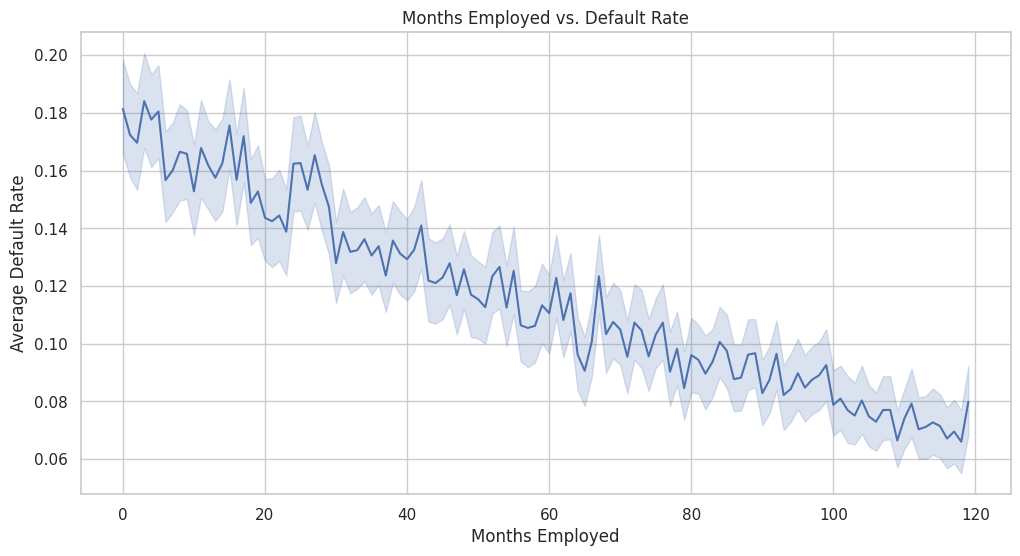

In [ ]:
# Months Employed vs. Default Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='MonthsEmployed', y='Default', estimator=np.mean)
plt.title('Months Employed vs. Default Rate')
plt.xlabel('Months Employed')
plt.ylabel('Average Default Rate')
plt.show()

## The "Default Rates by Education Level" Graph indicating if the education levels are more prone to default, which might affect how loans are offered.

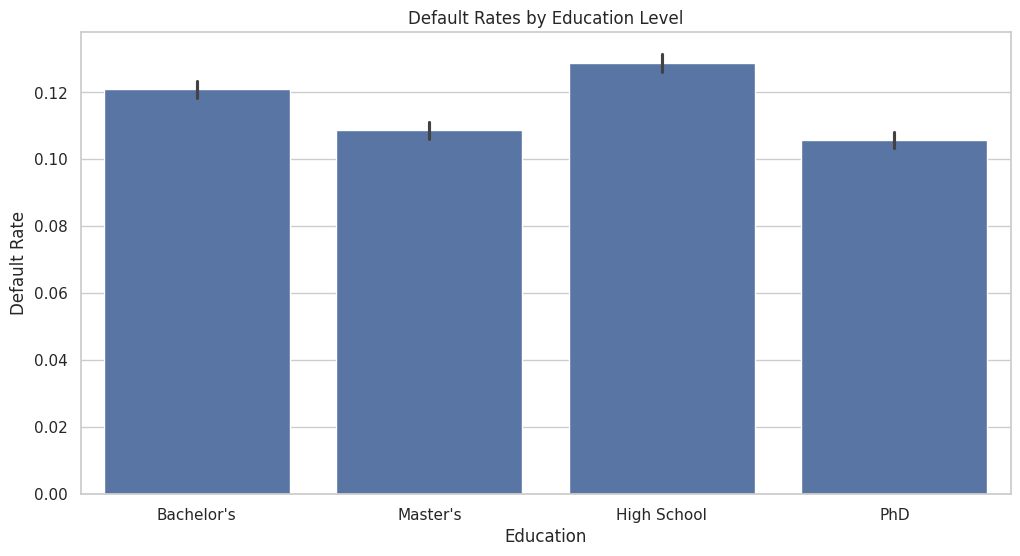

In [ ]:
# Default Rates by Education Level
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Default', data=df)
plt.title('Default Rates by Education Level')
plt.xlabel('Education')
plt.ylabel('Default Rate')
plt.show()

## A higher (Debt-to-Income Ratio) DTIRatio could indicate a higher risk of default, emphasizing the need to assess borrowers’ debt relative to their income

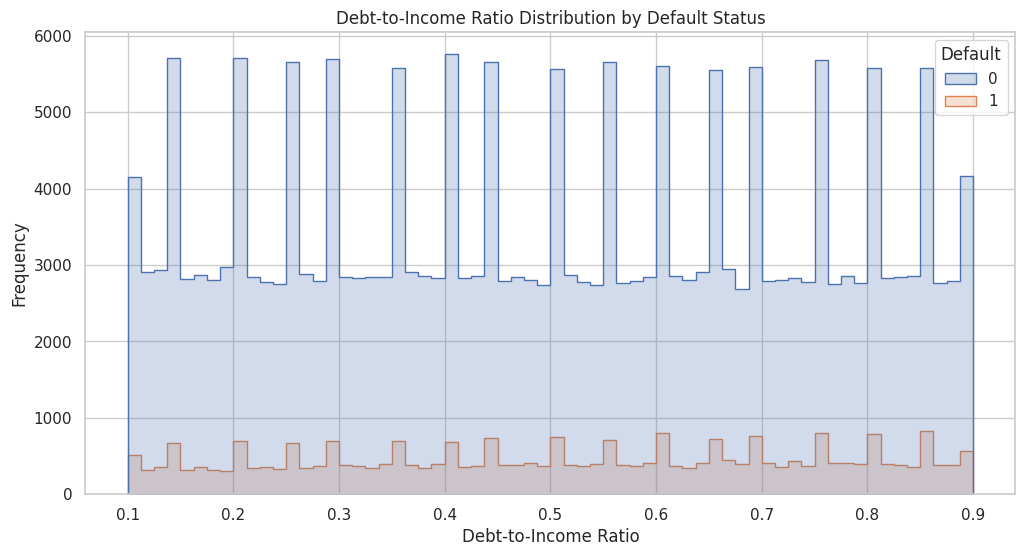

In [ ]:
# 4. Debt-to-Income Ratio (DTIRatio) Distribution by Default Status
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='DTIRatio', hue='Default', element='step', fill=True)
plt.title('Debt-to-Income Ratio Distribution by Default Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# displaying the first five rows of the new DataFrame that contains only numerical columns
numerical_df.head()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


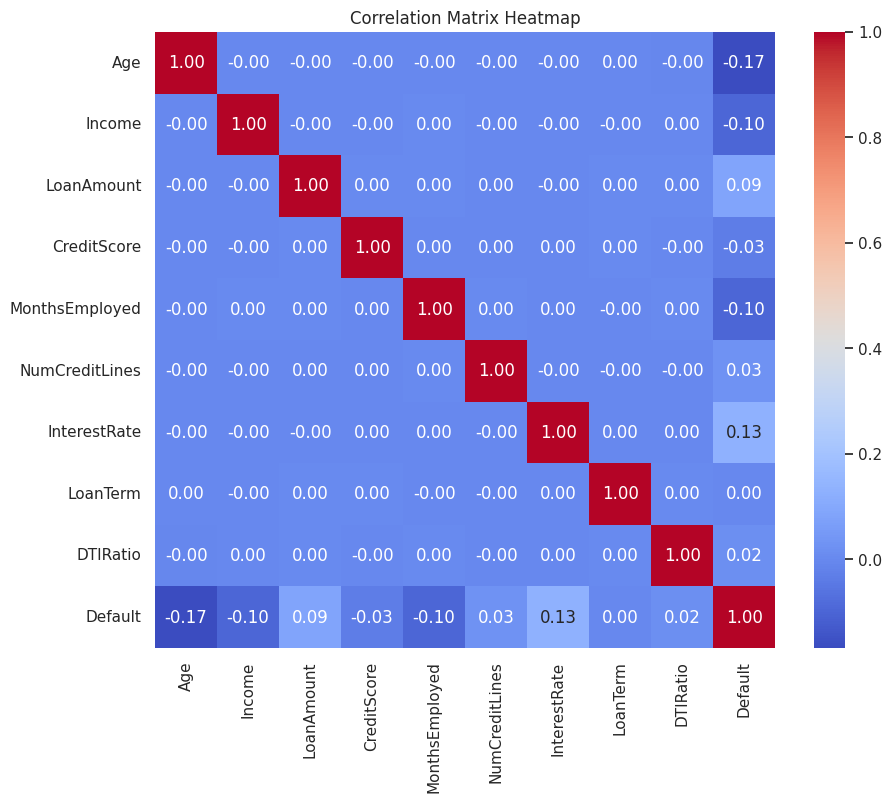

In [ ]:
correlation_matrix = numerical_df.corr()

# Plotting the correlation heatmap chart
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Structuring and preparing the Columns to be numerical for the Machine Learning Model training

In [ ]:
# Identify categorical and numerical columns
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_columns = df.columns.difference(categorical_columns + ['LoanID', 'Default'])  # excluding ID and target columns for modeling

# One-Hot Encoding
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

df_encoded = one_hot_encoder.fit_transform(df)
encoded_feature_names = one_hot_encoder.get_feature_names_out()

# Convert the numpy array back to DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names)

# Extracting only the one-hot encoded parts (removing 'remainder' columns which were passed through)
encoded_categorical_df = df_encoded.filter(regex='^cat__.*')

# Concatenate encoded categorical columns with numerical and target columns
final_df = pd.concat([df[numerical_columns], df['Default'], encoded_categorical_df], axis=1)

# View the final combined dataframe
final_df.head()

,Age,CreditScore,DTIRatio,Income,InterestRate,LoanAmount,LoanTerm,MonthsEmployed,NumCreditLines,Default,...,cat__HasMortgage_Yes,cat__HasDependents_No,cat__HasDependents_Yes,cat__LoanPurpose_Auto,cat__LoanPurpose_Business,cat__LoanPurpose_Education,cat__LoanPurpose_Home,cat__LoanPurpose_Other,cat__HasCoSigner_No,cat__HasCoSigner_Yes
0,56,520,0.44,85994,15.23,50587,36,80,4,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,458,0.68,50432,4.81,124440,60,15,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,46,451,0.31,84208,21.17,129188,24,26,3,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,743,0.23,31713,7.07,44799,24,0,3,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,633,0.73,20437,6.51,9139,48,8,4,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Isolating the Matrix of Features and the Dependent Variable

In [ ]:
Y = final_df['Default']

# Dropping the target column from the DataFrame to have only the features
X = final_df.drop('Default', axis=1)

In [ ]:
Y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [ ]:
X

,Age,CreditScore,DTIRatio,Income,InterestRate,LoanAmount,LoanTerm,MonthsEmployed,NumCreditLines,cat__Education_Bachelor's,...,cat__HasMortgage_Yes,cat__HasDependents_No,cat__HasDependents_Yes,cat__LoanPurpose_Auto,cat__LoanPurpose_Business,cat__LoanPurpose_Education,cat__LoanPurpose_Home,cat__LoanPurpose_Other,cat__HasCoSigner_No,cat__HasCoSigner_Yes
0,56,520,0.44,85994,15.23,50587,36,80,4,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,458,0.68,50432,4.81,124440,60,15,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,46,451,0.31,84208,21.17,129188,24,26,3,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,743,0.23,31713,7.07,44799,24,0,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,633,0.73,20437,6.51,9139,48,8,4,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,541,0.85,37979,14.11,210682,12,109,4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
255343,32,511,0.21,51953,11.55,189899,24,14,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
255344,56,597,0.50,84820,5.29,208294,60,70,3,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
255345,42,809,0.44,85109,20.90,60575,48,40,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Splitting the Data for testing and training

In [ ]:
# Splitting the data into 70% training and 30% testing, adjusting as necessary
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Printing the shape of the datasets to confirm the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (178742, 31) (178742,)
Testing set shape: (76605, 31) (76605,)


## Initializing and running the Machine Learning models

In [ ]:
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Training the Logistic Regression model
logistic_model.fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, logistic_predictions))

# Training the Decision Tree model
decision_tree_model.fit(X_train, Y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(Y_test, decision_tree_predictions))

# Training the Random Forest model
random_forest_model.fit(X_train, Y_train)
random_forest_predictions = random_forest_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(Y_test, random_forest_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67681
           1       0.65      0.01      0.03      8924

    accuracy                           0.88     76605
   macro avg       0.77      0.51      0.48     76605
weighted avg       0.86      0.88      0.83     76605

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67681
           1       0.21      0.24      0.22      8924

    accuracy                           0.80     76605
   macro avg       0.55      0.56      0.55     76605
weighted avg       0.82      0.80      0.81     76605

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.65      0.03      0.05      8924

    accuracy                           0.88     76605
   macro av

## Model Accuracy Bar-plots

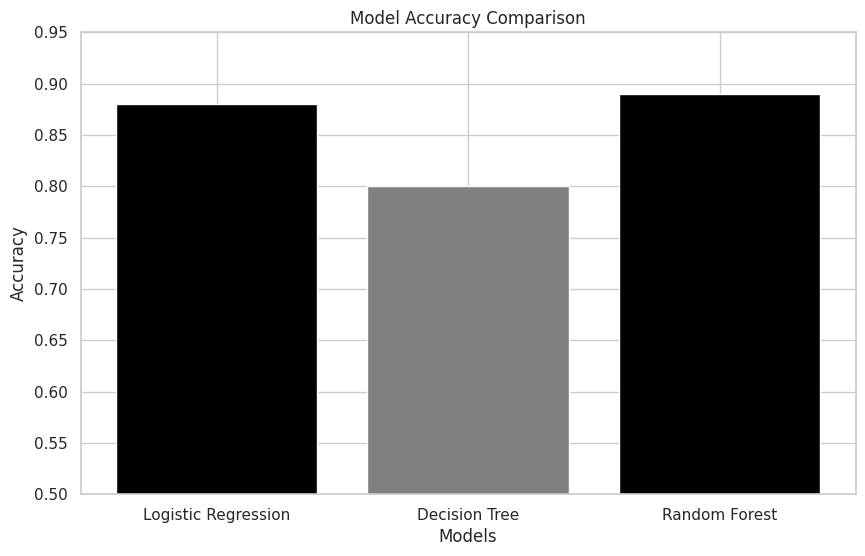

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.88, 0.80, 0.89]

# Creating the bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['black', 'grey', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0.5, 0.95])
plt.show()

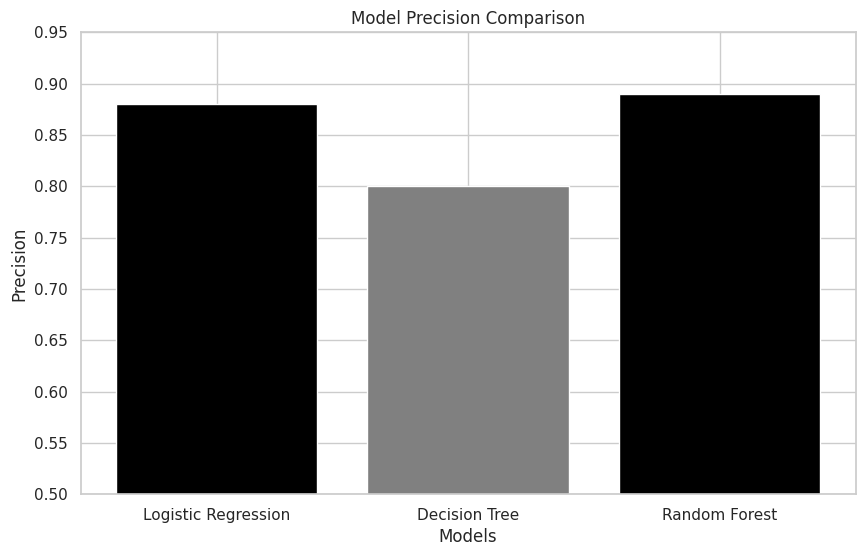

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precisions = [0.88, 0.90, 0.89]

# Creating the bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['black', 'grey', 'black'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.ylim([0.5, 0.95])
plt.show()

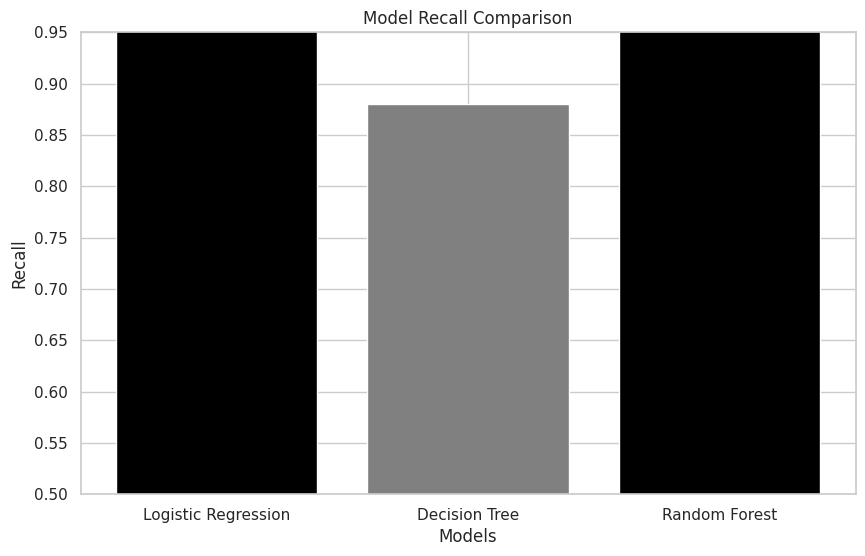

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [1.00, 0.88, 1.00]

# Creating the bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['black', 'grey', 'black'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.ylim([0.5, 0.95])
plt.show()

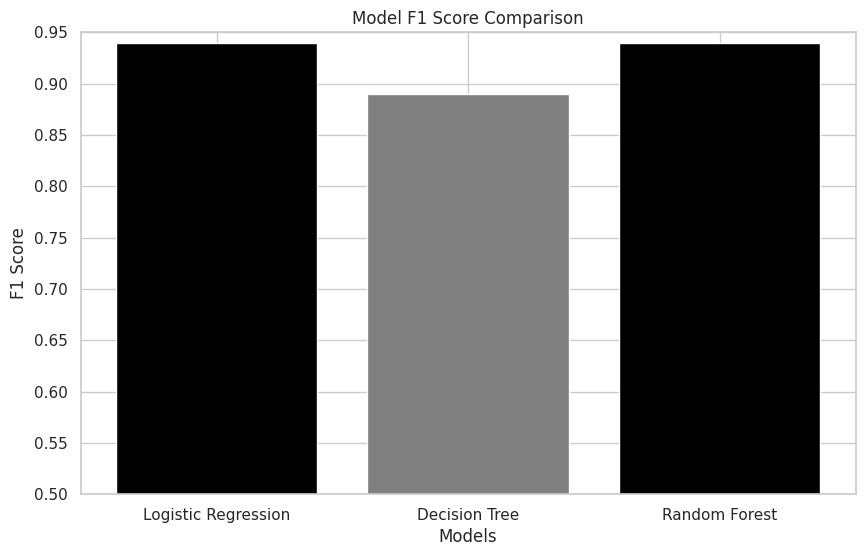

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.94, 0.89, 0.94]

# Creating the bar plot for F1 Score
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['black', 'grey', 'black'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.ylim([0.5, 0.95])
plt.show()

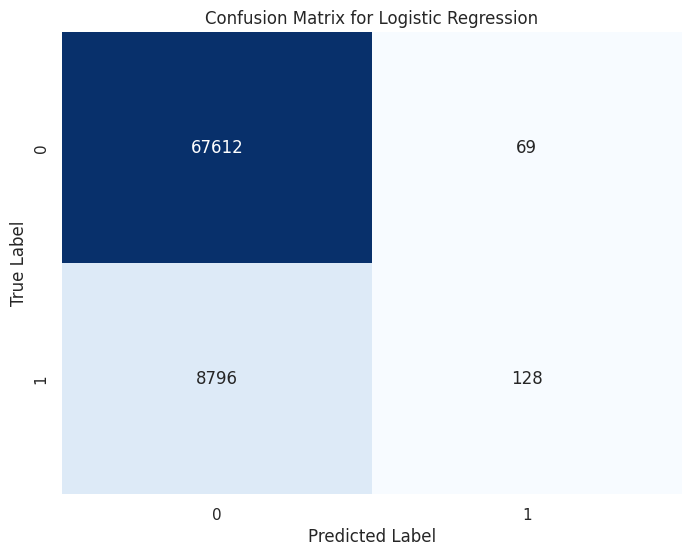

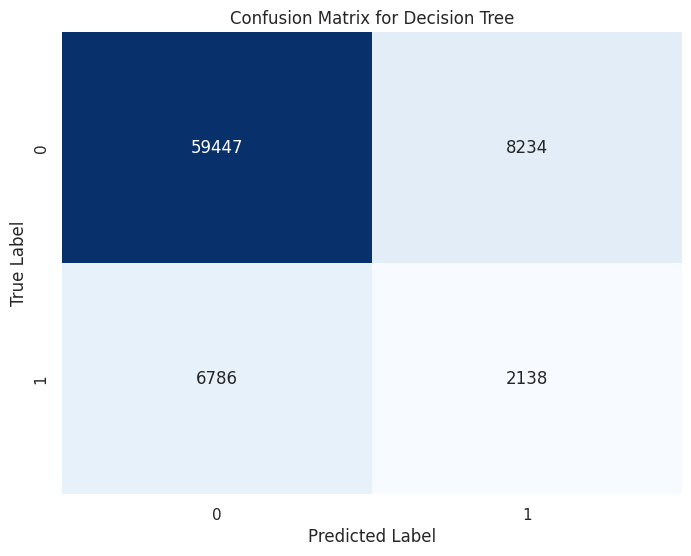

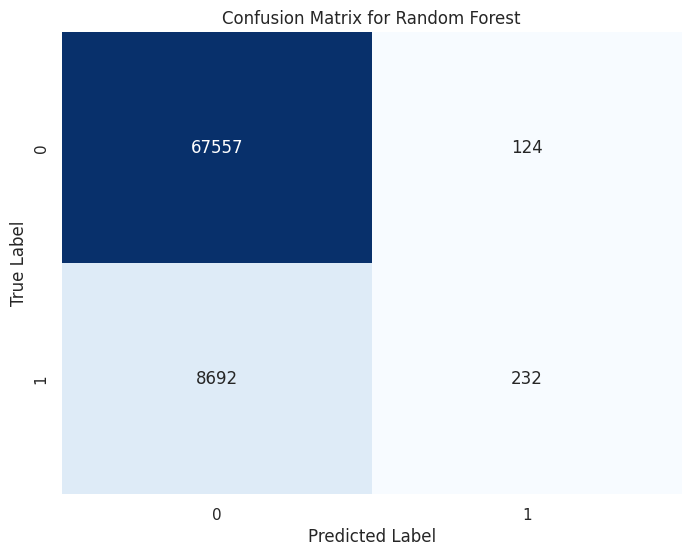

In [ ]:
cm_logistic = confusion_matrix(Y_test, logistic_predictions)
cm_decision_tree = confusion_matrix(Y_test, decision_tree_predictions)
cm_random_forest = confusion_matrix(Y_test, random_forest_predictions)

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Visualizing confusion matrices
plot_confusion_matrix(cm_logistic, 'Logistic Regression')
plot_confusion_matrix(cm_decision_tree, 'Decision Tree')
plot_confusion_matrix(cm_random_forest, 'Random Forest')